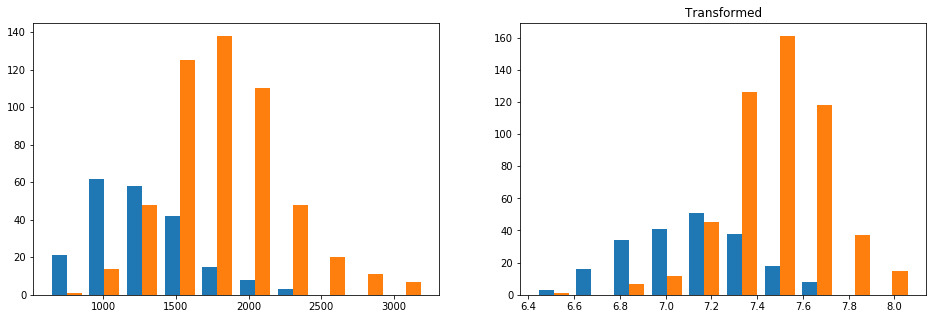

In [29]:
from scipy import stats

import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

def weekend(date):
    day = date.weekday()
    return day == 5 or day == 6


def weekday(date):
    return not weekend(date)


reddit_counts = pd.read_json('reddit-counts.json.gz', lines=True)
reddit_counts['year'] = reddit_counts['date'].apply(lambda x : x.year)
reddit_counts = reddit_counts[
    (reddit_counts['subreddit'] == 'canada') &
    ((reddit_counts['year'] == 2012) |
     (reddit_counts['year'] == 2013))
     ]

# don't need the year
del reddit_counts['year']
weekends = reddit_counts[reddit_counts['date'].apply(weekend)]
weekdays = reddit_counts[reddit_counts['date'].apply(weekday)]

figure = plt.figure(figsize=(16, 5))

figure.add_subplot(1, 2, 1)
plt.hist([
    weekends['comment_count'],
    weekdays['comment_count']]
)

weekends_transf = np.log(weekends['comment_count'])
weekdays_transf = np.log(weekdays['comment_count'])

figure.add_subplot(1, 2, 2)
plt.title('Transformed')
plt.hist([
    weekends_transf,
    weekdays_transf]
)

plt.show()